   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  
0                          4.09      23086.80050  1.059034e+06  
1                          3.09      40173.07217  1.505891e+06  
2                          5.13      36882.15940  1.058988e+06  
3                          3.26      34310.24283  1.260617e+06  
4                          4.23      26354.10947  6.309435e+05  
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900 

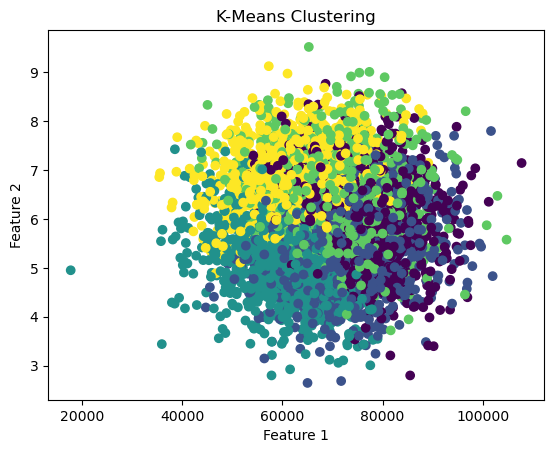

Cluster Centers:
[[ 0.71815842  0.03707902 -0.61411699 -0.51688691  0.84471958]
 [ 0.43516086 -0.51444174  0.88183243  1.03937351 -0.31259567]
 [-0.87465681 -0.82708661 -0.40574709 -0.53457999  0.15064138]
 [ 0.17268969  0.48581907 -0.59510086 -0.59588622 -0.90589861]
 [-0.56612474  0.82421017  0.77259439  0.62326105  0.35174521]]


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset (assuming it's now in CSV format)
# Adjust the path to your dataset
df = pd.read_csv('USA_Housing.csv')

# Display the first few rows to understand the structure
print(df.head())

# Omit the last column (assumed to be the target column or unnecessary attribute)
df = df.iloc[:, :-1]

# Normalize the data (optional but recommended for K-Means)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Implement K-Means clustering
kmeans = KMeans(n_clusters=5)  # You can change the number of clusters
kmeans.fit(df_scaled)

# Add the cluster labels to the dataframe
df['Cluster'] = kmeans.labels_

# Show the clustered data
print(df.head())

# Visualize the clusters (Optional, works best with 2D or 3D data)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Get the centroids of the clusters
print("Cluster Centers:")
print(kmeans.cluster_centers_)


   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  
0                          4.09      23086.80050  1.059034e+06  
1                          3.09      40173.07217  1.505891e+06  
2                          5.13      36882.15940  1.058988e+06  
3                          3.26      34310.24283  1.260617e+06  
4                          4.23      26354.10947  6.309435e+05  
Clusters: [[0, 4, 9, 14, 15, 23, 24, 32, 33, 34, 36, 44, 46, 54, 55, 57, 68, 74, 89, 91, 97, 111, 116, 122, 124, 136, 140, 151, 154, 156, 159, 165, 166, 180, 193, 196, 201, 203, 212, 

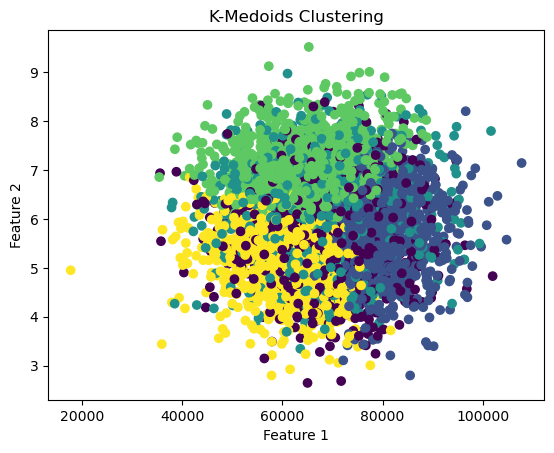

Final Medoids (Indices of the medoid points): [2641, 3084, 146, 3574, 2785]


In [7]:
import pandas as pd
from pyclustering.cluster.kmedoids import kmedoids
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset (assuming it's in CSV format)
df = pd.read_csv('USA_Housing.csv')

# Display the first few rows to understand the structure
print(df.head())

# Omit the last column (assuming it is the target column or unnecessary attribute)
df = df.iloc[:, :-1]

# Normalize the data (optional but recommended for K-Medoids)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert the data to a list of lists format, as required by pyclustering
data = df_scaled.tolist()

# Initialize K-Medoids with number of clusters (choose the number of clusters, say 5)
initial_medoids = [0, 1, 2, 3, 4]  # You can select random or predefined data points as initial medoids
kmedoids_instance = kmedoids(data, initial_medoids)

# Perform the clustering
kmedoids_instance.process()

# Get the clusters and the final medoids
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

# Show the resulting clusters
print(f'Clusters: {clusters}')
print(f'Medoids: {medoids}')

# Optionally, you can add the cluster labels to your dataframe
df['Cluster'] = -1
for cluster_id, cluster_points in enumerate(clusters):
    for point_index in cluster_points:
        df.iloc[point_index, -1] = cluster_id

# Show the dataframe with clusters
print(df.head())

# Visualizing the clusters (works best with 2D or 3D data)
# For simplicity, we'll plot the first two features of the dataset
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('K-Medoids Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Print the final medoids
print(f"Final Medoids (Indices of the medoid points): {medoids}")


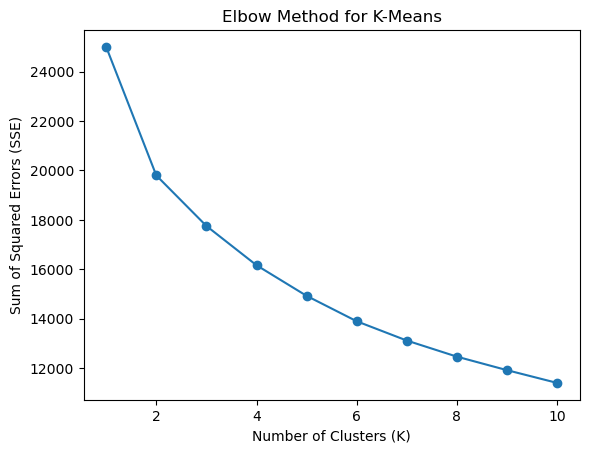

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset (assuming it's in CSV format)
df = pd.read_csv('USA_Housing.csv')

# Omit the last column (assuming it is the target column or unnecessary attribute)
df = df.iloc[:, :-1]

# Normalize the data (optional but recommended for K-Means)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Function to calculate SSE for K-Means
def calculate_sse(k, data):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    sse = kmeans.inertia_  # Inertia is the sum of squared distances to centroids
    return sse

# Calculate SSE for a range of K values
sse_values = []
k_range = range(1, 11)  # Testing K from 1 to 10
for k in k_range:
    sse = calculate_sse(k, df_scaled)
    sse_values.append(sse)

# Plot SSE vs K to visualize the elbow
plt.plot(k_range, sse_values, marker='o')
plt.title('Elbow Method for K-Means')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()


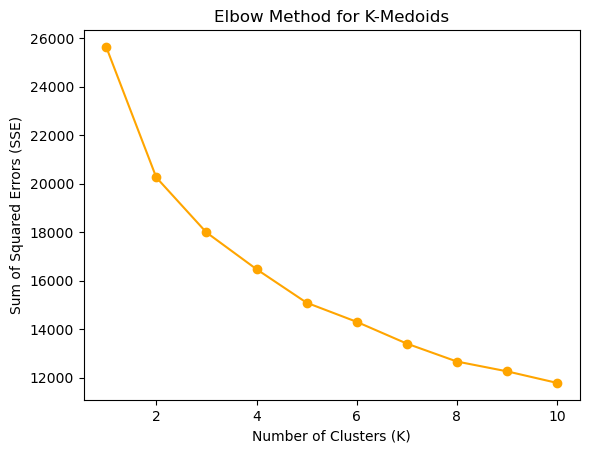

In [11]:
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.metrics import pairwise_distances

# Function to calculate SSE for K-Medoids
def calculate_sse_kmedoids(k, data):
    # Randomly choose k initial medoids
    initial_medoids = list(range(k))  # Selecting first K data points as initial medoids
    kmedoids_instance = kmedoids(data, initial_medoids)
    
    # Perform the clustering
    kmedoids_instance.process()
    
    # Get the clusters and medoids
    clusters = kmedoids_instance.get_clusters()
    medoids = kmedoids_instance.get_medoids()
    
    # Calculate SSE: sum of squared distances from each point to its medoid
    sse = 0
    for cluster_id, cluster_points in enumerate(clusters):
        medoid = medoids[cluster_id]
        for point_index in cluster_points:
            sse += np.sum((np.array(data[point_index]) - np.array(data[medoid])) ** 2)
    return sse

# Calculate SSE for a range of K values
sse_values_kmedoids = []
for k in k_range:
    sse = calculate_sse_kmedoids(k, df_scaled)
    sse_values_kmedoids.append(sse)

# Plot SSE vs K to visualize the elbow for K-Medoids
plt.plot(k_range, sse_values_kmedoids, marker='o', color='orange')
plt.title('Elbow Method for K-Medoids')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()
